## Reference

This code has been adapted from the github:
https://github.com/mml-book/mml-book.github.io


In [3]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

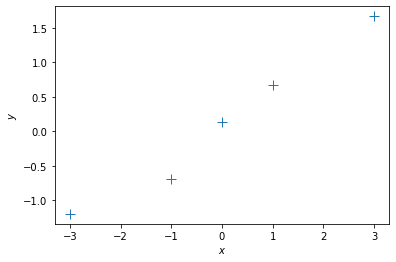

In [4]:
# simple linear type dataset

X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

Maximum likelihood estimate


In [5]:
# maximum likelihood estimate is same as least square solution

def find_max_likelihood_estimate(X, y):
    inv = linalg.inv(np.matmul(X.T, X))
    Xty= (X.T).dot(y)
    #inv(X'X)X'y
    return inv.dot(Xty)

def test_prediction(Xtest, theta):
    return Xtest.dot(theta)

In [6]:
theta_ml = find_max_likelihood_estimate(X,y)

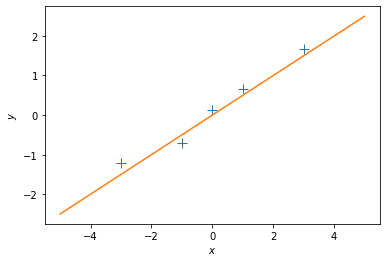

In [7]:
# generate fine grained test points
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = test_prediction(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

### Discussion
Notice that this works reasonably well. But, that is only true because data passes through the origin

In [8]:
# print the value of theta
# note it is 1D meaning there is no bias
theta_ml


array([[0.499]])

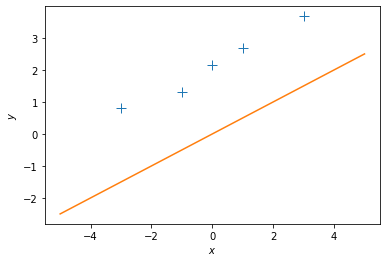

In [9]:
# Delibearately introduce some bias by adding 2
# Note that our model is of the form y =mx, i.e. without bias

y = y+2.0
theta_ml = find_max_likelihood_estimate(X,y)
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = test_prediction(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

## Analysis
We have deliberately added bias to the data, but our model is still without bias. That has resulted into mismatch between model and data.

In [10]:
X.shape

(5, 1)

In [11]:
# Code to add a column of ones. Because of that, our model now incorporates bias.

def add_bias_column(X):
    N, d = X.shape
    out = np.ones((N,d+1))
    out[:,:-1]= X
    return out

In [12]:
X1 = add_bias_column(X)
X1

array([[-3.,  1.],
       [-1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 3.,  1.]])

In [13]:
# Now we have added columns of ones in X to make X1, our model automatically expects \theta of size 2: bias and slope.
# Therefore, we expect that this will solve the problem

theta_ml = find_max_likelihood_estimate(X1,y)
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs
Xtest = add_bias_column(Xtest)



# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = test_prediction(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X1[:,:-1], y, '+', markersize=10)
plt.plot(Xtest[:,:-1], ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.close()

In [14]:
theta_ml 

array([[0.499],
       [2.116]])

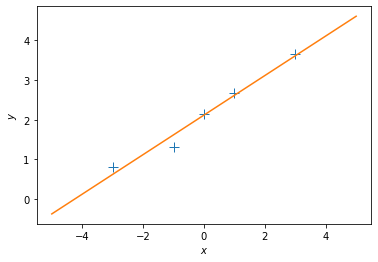

In [16]:
new_theta = theta_ml[:]
# new_theta[1]=theta_ml[1]
new_pred = Xtest.dot(new_theta)

plt.figure()
# Note that while plotting, we don't want extra column of ones. We just want to plot x vs y
# Hence we take all the columns except the last one, hence [:,:-1]
plt.plot(X1[:,:-1], y, '+', markersize=10)
plt.plot(Xtest[:,:-1], new_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");
# plt.close()

## Discussion
So far, we saw that depeding upon the data, we can change the matrix X and that leads to change in model. For example, we considered linear model with and without bias. When the data has bias, i.e. it does not pass through the origin, then we must model the bias, or else the best fit would be bias away from the true prediction.

But, now, we change gear. We want to see if our linear regression can handle a situation where we have nonlinear data. 
We generate sinusoidal data and try to see if we can fit that with linear regression.

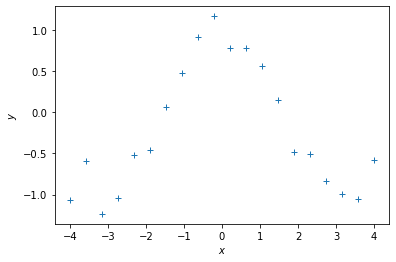

In [19]:
# Define f as a cosine function with small Gaussian noise

def f(x):   
    return np.cos(x) + 0.2*np.random.normal(size=(x.shape))

X = np.linspace(-4,4,20).reshape(-1,1)
y = f(X)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

In [20]:
# test code used to generate polynomial feature
K = 2
print('Original shape', X.shape)
N = X.shape[0]
one_array =np.ones(shape = (N,1), dtype = X.dtype)
X_new = np.concatenate((one_array, X), axis =-1)
if K >1:
    for i in range(2, K+1):
        X_new = np.concatenate((X_new, np.power(X,i)), axis =-1)
        print ('loop:', i, X_new.shape)
print('x array', X_new.shape)

Original shape (20, 1)
loop: 2 (20, 3)
x array (20, 3)


In [21]:
# code to generate polynomial feature
def poly_features(X,K):
    N = X.shape[0]
    one_array =np.ones(shape = (N,1), dtype = X.dtype)
    X_new = np.concatenate((one_array, X), axis =-1)
    if K >1:
        for i in range(2, K+1):
            X_new = np.concatenate((X_new, np.power(X,i)), axis =-1)
    return X_new
    

In [22]:
def  nonlinear_features_maximum_likelihood(X, y):
    inv = linalg.inv(np.matmul(X.T, X))
    Xty= (X.T).dot(y)
    return inv.dot(Xty)

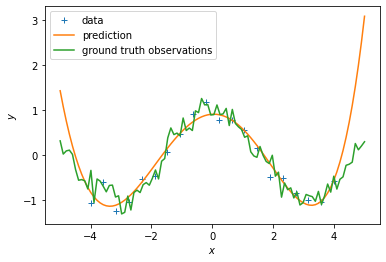

In [30]:
## EDIT THIS CELL
K = 5 # Define the degree of the polynomial we wish to fit

Phi = poly_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = f(Xtest) # ground-truth y-values

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test.dot(theta_ml) # <-- EDIT THIS LINE

# plot
plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.plot(Xtest, ytest)
plt.legend(["data", "prediction", "ground truth observations"])
plt.xlabel("$x$")
plt.ylabel("$y$");

In [26]:
def RMSE(y, y_pred):
    return np.sqrt((np.square(y-y_pred)).mean())

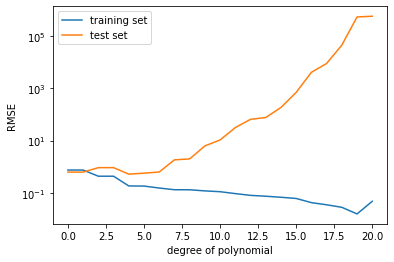

In [27]:
# Now we try to plot polynomial degree vs the test RMSE 
K_max = 20
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))

for k in range(K_max+1):
    
    # feature matrix
    Phi = poly_features(X, k)
    
    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    
    # predict y-values of training set
    ypred_train = Phi @ theta_ml
    
    # RMSE on training set
    rmse_train[k] = RMSE(y, ypred_train)    
    
    # feature matrix for test inputs
    Phi_test = poly_features(Xtest, k)
    
    # prediction
    ypred_test = Phi_test @ theta_ml
    
    # RMSE on test set
    rmse_test[k] = RMSE(ytest, ypred_test)
    

plt.figure()
plt.semilogy(rmse_train) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_test) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"]);

In [28]:
np.argmin(rmse_test)

4